In [1]:
from pylab import*
%matplotlib inline

In [2]:
def f(x,omega=1):
    return sin(omega*x)

def g(h_de_x,x):    #G es una función que afwcta a f y f es un avariable de ella
    return exp(-x)*h_de_x(x)
    

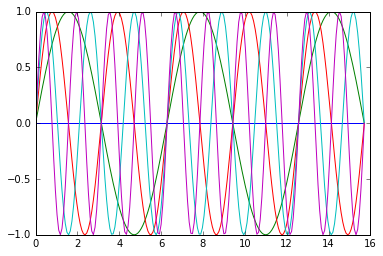

In [3]:
x = linspace(0, 5*pi,200)
for i in range(5):
    plot(x,f(x,i))
show()

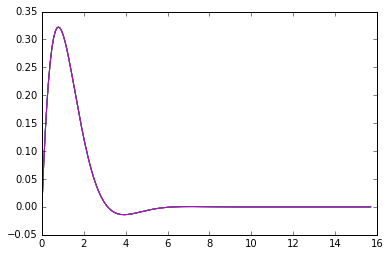

In [4]:
x = linspace(0, 5*pi,200)
for i in range(5):
    plot(x,g(f,x))
show()

In [5]:
#vamos a hacer una nueva versión de G para que pueda psar argymentos a las funciones f

def g1(h_de_x,x,args=[]):    #G es una función que afwcta a f y f es un avariable de ella
    if len(args)==0:
        resultado=exp(-x)*h_de_x(x)
    else:
        resultado=exp(-x)*h_de_x(x,args)
    return resultado

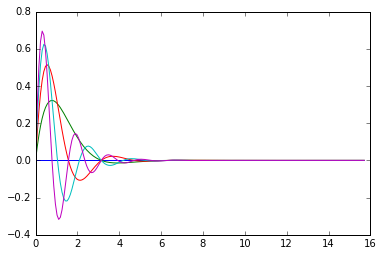

In [6]:
x = linspace(0, 5*pi,200)
for i in range(5):
    plot(x,g1(f,x,[i]))
show()

Ahora vamos a ver que se puede hacer con Runge Kutta

In [7]:
def rk4(ec,p_ini,x,args=0,h=0.01):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

Ahora vamos a ver si jala esra coda con una pelota rebotando
$$
m \vec f = -g \hat j - f(\vec r, t) \dot {\hat x}
$$
la f puede depender del modelo que cada quién escoja y puede valer verga entonces tengo qué hacer algo general

In [8]:
def e_mov(r_v,t,fric=0,g=9.8,m=1 ):
    u=sqrt(r_v[2]**2+r_v[3]**2)
    dx = r_v[2]
    dy = r_v[3]
    if fric==0:
        dvx,dvy = 0, -(g/m)
#        print "So use modelo de friccion"   solo para ver si si esntra en elos ciclos que quierp
    else:
        dvx = -( fric([r_v[2],r_v[3]])*r_v[2])[0]
        dvy = -(g/m) - fric([r_v[2],r_v[3]])[1]
#        print "use modelo de frccion"
    return array([dx,dy,dvx,dvy])

In [9]:
def fric_id(v):   #ideal, o sea que no pasa nada
    return array([0,0])

def fric_v1(v,gamma=0.1):
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y])

def fric_v2(v,gamma=0.1):
    norm_v = sqrt(v[0]**2+v[1]**2)
    f_x = gamma*v[0]*norm_v
    f_y = gamma*v[1]*norm_v
    return array([f_x,f_y])
    

In [10]:
print e_mov([1,1,1,1],1)
print e_mov([1,1,1,1],1,fric_id)
print e_mov([1,1,1,1],1,fric_v1)
print e_mov([1,1,1,1],1,fric_v2)

[ 1.   1.   0.  -9.8]
[ 1.   1.   0.  -9.8]
[ 1.   1.  -0.1 -9.9]
[ 1.          1.         -0.14142136 -9.94142136]


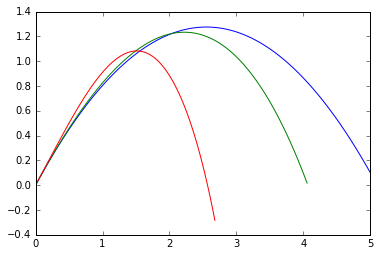

In [11]:
p=[0,0,5,5]
t,sol_id = rk4(e_mov,p,[0,1])
t,sol_fv1 = rk4(e_mov,p,[0,1],fric_v1)
t,sol_fv2 = rk4(e_mov,p,[0,1],fric_v2)
plot(sol_id[:,0],sol_id[:,1])
plot(sol_fv1[:,0],sol_fv1[:,1])
plot(sol_fv2[:,0],sol_fv2[:,1])

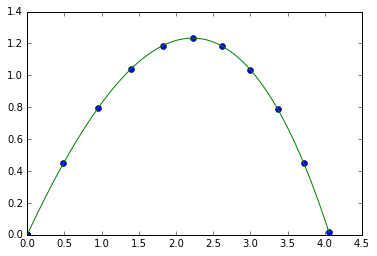

In [14]:
inicio=[0,0,5,5]
N=500
trayectoria=zeros((N,len(inicio)))
mi_dt=.1
trayectoria[0,:]=array(inicio)
for i in range(N):
    t,sol_dt=rk4(e_mov,inicio,[0,mi_dt],fric_v1)
    if sol_dt[-1,:][1]<0:
            break
    inicio=sol_dt[-1,:]
    trayectoria[i+1,:]=inicio
plot(trayectoria[:,0],trayectoria[:,1],'o')
plot(sol_fv1[:,0],sol_fv1[:,1])
show()